# Combining categorical and numerical variables

In [ ]:
import pandas as pd

adult_census = pd.read_csv("datasets/adult-census.csv")

adult_census = adult_census.drop(columns="education-num")

target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

## Selecting different column types

In [3]:
from sklearn.compose import make_column_selector as selector

In [4]:
numerical_columns_selector = selector(dtype_exclude=object)

In [5]:
categorical_columns_selector = selector(dtype_include=object)

In [10]:
categorical_columns = categorical_columns_selector(data)
numerical_columns = numerical_columns_selector(data)

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [7]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

In [12]:
numerical_preprocessor = StandardScaler()

In [9]:
from sklearn.compose import ColumnTransformer

In [13]:
preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns)
    ]
)

In [14]:
preprocessor

ColumnTransformer(transformers=[('one-hot-encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country']),
                                ('standard_scaler', StandardScaler(),
                                 ['age', 'capital-gain', 'capital-loss',
                                  'hours-per-week'])])

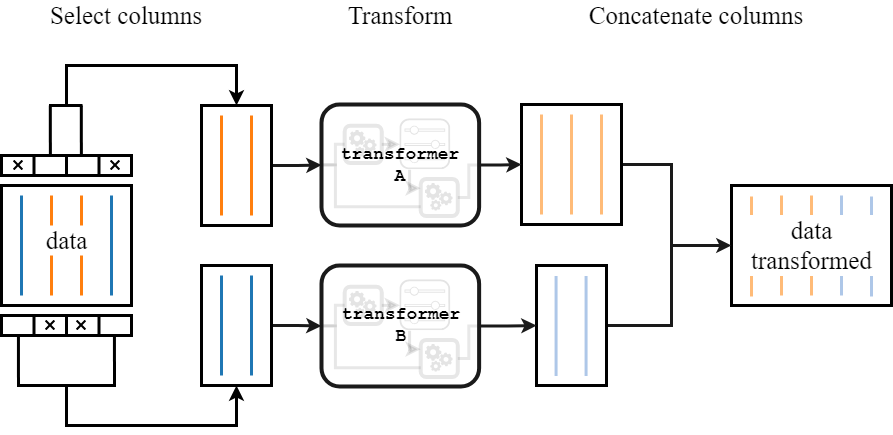

## Integrating a preprocessor into the predictive modeling pipeline

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [17]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [20]:
_ = model.fit(data_train, target_train)

In [21]:
model.predict(data_test)[:5]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K'], dtype=object)

## Decision tree classifier

In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

In [24]:
categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)

preprocessor = ColumnTransformer(
    [("categorical", categorical_preprocessor, categorical_columns)],
    remainder="passthrough"
)

In [25]:
model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [26]:
_ = model.fit(data_train, target_train)

In [27]:
model.score(data_test, target_test)

0.8801899926295963

## Solution exercises
### Q1

In [29]:
categorical_preprocessor = OrdinalEncoder()

In [36]:
preprocessor = ColumnTransformer(
    [("categorical", categorical_preprocessor, categorical_columns)],
    remainder="passthrough"
)

In [37]:
model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [38]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [39]:
_ = model.fit(data_train, target_train)

In [40]:
model.score(data_test, target_test)

0.8791253787568586

### Q2

In [ ]:
numerical_preprocessor = StandardScaler()

In [41]:
preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorical_columns),
        ("numerical", numerical_preprocessor, numerical_columns)
    ]
)

In [42]:
model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [43]:
_ = model.fit(data_train, target_train)

In [44]:
model.score(data_test, target_test)

0.877733191384817

### Q3

In [45]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [46]:
preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns)]
)

In [47]:
model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [48]:
_ = model.fit(data_train, target_train)

In [49]:
model.score(data_test, target_test)

0.8805175661289002